<a href="https://colab.research.google.com/github/yesid-acm/Regresion_GLM/blob/main/Regresi%C3%B3n_lineal_m%C3%BAltiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio de regresión lineal múltiple 
Elaborado desde Colab.

* La data corresponde a información para calcular el precio de la prima del seguro a aprtir de las caracteristicas de los afiliados.
* Se verifican los supuestos del modelo de regresión lineal.


fuente data = https://www.kaggle.com/mirichoi0218/insurance/metadata



## Comprensión del Dataset
El Dataset es un archivo en CSV con 1338 registros de información y encabezados, que parece contener información de una empresa aseguradora. Contiene las variables (age, sex, bmi, children, smoker, región, charges)
3 de estas variables son categóricas (sex, smoker y región). Se busca predecir charges que es la prima del seguro


In [ ]:
# Import helpful libraries
import pandas as pd
import numpy as np

import statsmodels.stats.diagnostic as smd
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split
import sklearn.linear_model as skl_ml
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

from sklearn.ensemble import RandomForestRegressor

# esto es para la sección 'depuración modelo'
!pip install mlxtend
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from sklearn.feature_selection import SequentialFeatureSelector as backward_selection


## Exploración de la data

In [ ]:
# lectura de la data
data_insure = pd.read_csv('./insurance.csv')

#data_insure_cate = pd.read_csv('./insurance_categoricas.csv', sep = ';')

print(f' dimensiones :{data_insure.shape}')
data_insure.head()

 dimensiones :(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# información de la data
data_insure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


No se tiene datos faltantes en ninguna variable.

In [ ]:
# cuartiles y medidas de dispersión y central.
data_insure.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## gráficos univariados

Text(0.5, 1.0, 'distribución asimétrica de -prima del seguro-')

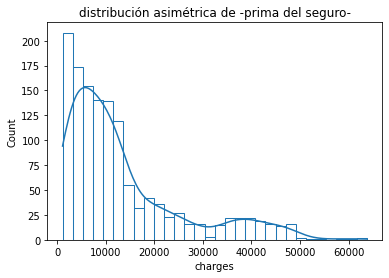

In [ ]:
# variable de respuesta
sns.histplot(data_insure.charges, fill=False, kde=True)

plt.title('distribución asimétrica de -prima del seguro-')

La variable de interés, charges (prima del seguro), tiene una distribución asimétrica.Observandose la mayor cantidad de personas en entre cero (0) y 15 mil 'pesos'.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


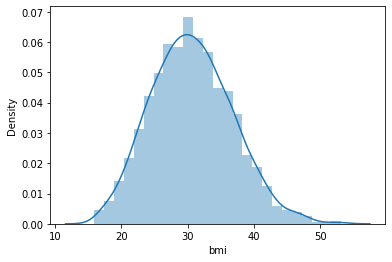

In [ ]:
# indice de masa corporal
sns.distplot(data_insure.bmi )

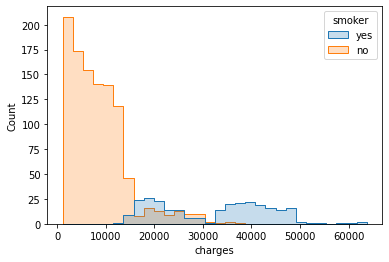

In [ ]:
# grafico bivariado : charges VS dicotomica de fumar
sns.histplot(x=data_insure.charges, hue=data_insure.smoker, element='step')

Se identifica que aquellos fumadores presentan un valor más alto en la prima del seguro, es decir, a partir de 15 mil pesos. Viendose esto más marcado en valores superiores a 34 mil pesos, aproximadamente.

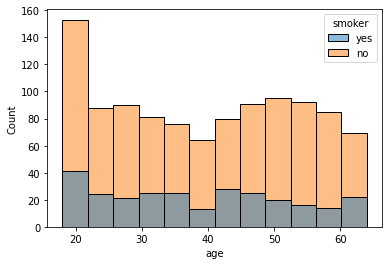

In [ ]:
#  edad VS dicotomica fumar 
sns.histplot(x=data_insure.age, hue=data_insure.smoker)

Se identifica que son más los 'no fumadores' en cada edad, sobresaliendo en la edad de 20 años.

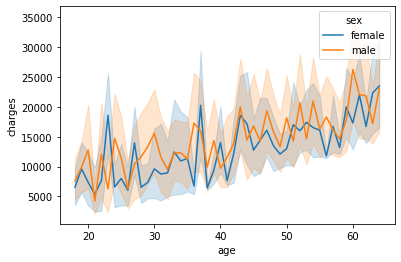

In [ ]:
# Edad VS precio del seguro VS sexo 
sns.lineplot(x='age', y='charges', hue='sex', data=data_insure)

Se logra observar un mayor valor en la prima del seguro para los hombres (linea zapote). 

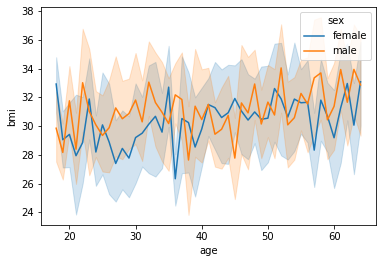

In [ ]:
sns.lineplot(x='age', y='bmi', hue='sex', data=data_insure)

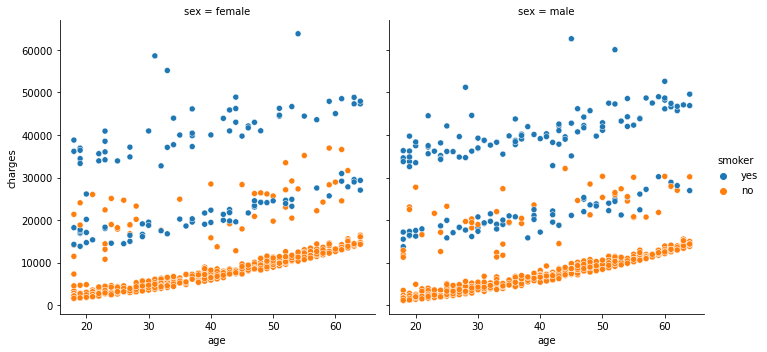

In [ ]:
# Edad VS prima del seguro VS sexo
sns.relplot(x='age', y='charges', col='sex', hue='smoker', data=data_insure)

Se identifica de manera importante que las personas que fuman tiene un valor superior en la prima, la mayoria de personas de puntos azules tiene valores superiores a 30 mil pesos tanto en hombre y mujer.

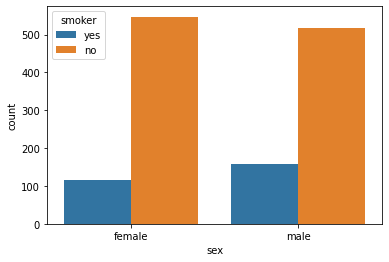

In [ ]:
sns.countplot(x=data_insure.sex, hue=data_insure.smoker)

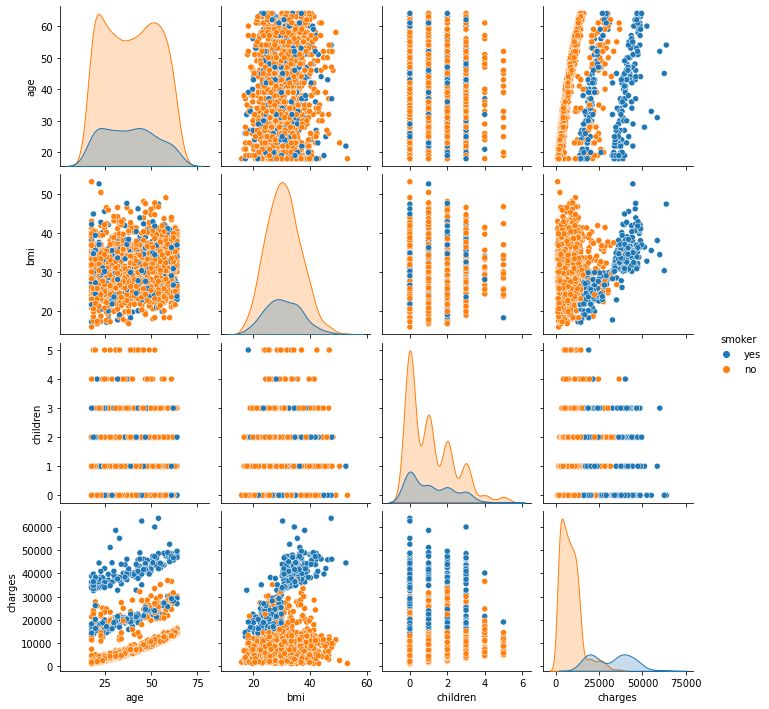

In [ ]:
# Gráficos de dispersión densidad para las variable númericas
sns.pairplot(data_insure, hue='smoker')

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


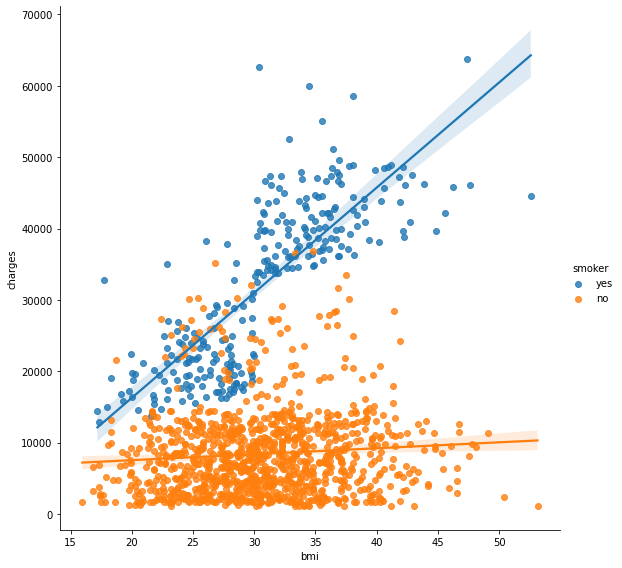

In [ ]:
# Prima de seguro VS indice de masa corporal
sns.lmplot(x="bmi", y="charges", hue='smoker', data=data_insure, size=8)

In [ ]:
# correlaciones

correlaciones = data_insure.corr()

correlaciones.sort_values(['charges'], ascending=False, inplace=True)
print(correlaciones.charges)

correlaciones.style.background_gradient(cmap='coolwarm')

charges     1.000000
age         0.299008
bmi         0.198341
children    0.067998
Name: charges, dtype: float64


,age,bmi,children,charges
charges,0.299008,0.198341,0.067998,1.000000
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998


## Limpieza de Datos
Para la limpeza de datos solo se validan los valores numericos y se reemplazan los valores nulos por 0 


In [ ]:
DataSet_DatosNum = data_insure.select_dtypes(np.number).fillna(0)

## Creación Dataset
 

*   La validación nos permite configurar el modelo de manera agil para su posterior implementación en el mundo real.
*   Si mejora los resultados ya que te permite realizar diferentes escenarios sin utilizar todo el dataset de train.
*   Permite conocer las variaciones de los hiperparametros del modelo.

In [ ]:
variable_objetivo = "charges"
variables_independientes = DataSet_DatosNum.drop(columns=variable_objetivo).columns

# sets train y test
X_train_num, X_test_num, y_train_num, y_test_num = train_test_split(DataSet_DatosNum[variables_independientes],
                                                                    DataSet_DatosNum[variable_objetivo],
                                                                    test_size = 0.2,
                                                                    random_state = 0)
# sets validación
X_train_num, X_val_num, y_train_num, y_val_num = train_test_split(X_train_num, y_train_num,
                                                  test_size=0.2, 
                                                  random_state=1)

SL = 0.05
X_train_num

,age,bmi,children
1279,25,26.79,2
200,19,32.11,0
746,34,27.00,2
908,63,39.80,3
1015,59,25.46,0
...,...,...,...
1211,39,34.10,2
929,41,34.21,1
121,18,23.75,0
1009,51,27.74,1


# Elaboración del modelo

In [ ]:
# aquí se unifica la X y la 'y'

data_reg_num = X_train_num.copy()
data_reg_num['charges'] = y_train_num

# Ajuste del modelo lineal con mínimios cuadrados ordinarios
regression_OLS = smf.ols('charges ~ age + bmi + children', data_reg_num).fit()
regression_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     33.10
Date:                Fri, 25 Feb 2022   Prob (F-statistic):           3.06e-20
Time:                        19:28:28   Log-Likelihood:                -9209.7
No. Observations:                 856   AIC:                         1.843e+04
Df Residuals:                     852   BIC:                         1.845e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5356.6152   2142.088     -2.501      0.013   -9561.004   -1152.226
age          211.5665     27.964      7.566      0.000     156.681     266.452
bmi          307.1172     62.602      4.906      0.000     184.244     429.990
children     665.7906    323.204      2.060      0.040      31.421    1300.161
==============================================================================
Omnibus:                      237.694   Durbin-Watson:                   2.124
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              477.658
Skew:                           1.624   Prob(JB):                    1.90e-104
Kurtosis:                       4.685   Cond. No.                         282.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Analisis resultados:
* Como se puede observar se cuenta todas las variables significativas al compararlo con el SL, ya que los p-valores son menores al SL. Lo cual se rechaza la hipotesis nula (H_{0} : 𝛃_{i} = 0 ). β_{i} es el coeficiente i-ésimo

* Respecto al R-cuadrado (R2), se identifica un valor de 0.10, lo cual es un valor muy bajo, ya que el modelo está explicando sólo el 10% de la variación de la variable 'charges', variable de respuesta.
   

# Modelo con variables categoricas

In [ ]:
data_insure.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
set(data_insure.region)

{'northeast', 'northwest', 'southeast', 'southwest'}

In [ ]:
# Preprocesar variables categoricas

DataSet_Categ = data_insure.copy()

#  el método/API smf permite ingresar la variable
# importante que sea tipo 'object/category' y es automatico el proceso.

variable_objetivo = "charges"
variables_independientes = DataSet_Categ.drop(columns=variable_objetivo).columns

# sets train y test
X_train_categ, X_test_categ, y_train_categ, y_test_categ = train_test_split(DataSet_Categ[variables_independientes],
                                                                            DataSet_Categ[variable_objetivo],
                                                                            test_size = 0.2,
                                                                            random_state = 0)
# sets validación
X_train_categ, X_val_categ, y_train_categ, y_val_categ = train_test_split(X_train_categ, y_train_categ,
                                                                          test_size=0.2, 
                                                                          random_state=1)

SL = 0.05
X_train_categ

,age,sex,bmi,children,smoker,region
1279,25,female,26.79,2,no,northwest
200,19,female,32.11,0,no,northwest
746,34,male,27.00,2,no,southwest
908,63,male,39.80,3,no,southwest
1015,59,male,25.46,0,no,northwest
...,...,...,...,...,...,...
1211,39,male,34.10,2,no,southeast
929,41,male,34.21,1,no,southeast
121,18,male,23.75,0,no,northeast
1009,51,male,27.74,1,no,northeast


In [ ]:
# aquí se unifica la X y la 'y'

data_reg_categ = X_train_categ.copy()
data_reg_categ['charges'] = y_train_categ

# Ajuste del modelo lineal con mínimios cuadrados ordinarios
regression_OLS_categ = smf.ols('charges ~ age	+ sex + bmi + children + smoker + region', data_reg_categ).fit()
regression_OLS_categ.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     311.2
Date:                Fri, 25 Feb 2022   Prob (F-statistic):          3.63e-246
Time:                        19:28:43   Log-Likelihood:                -8670.1
No. Observations:                 856   AIC:                         1.736e+04
Df Residuals:                     847   BIC:                         1.740e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.174e+04   1218.314     -9.639      0.000   -1.41e+04   -9351.800
sex[T.male]          -141.4974    417.988     -0.339      0.735    -961.912     678.917
smoker[T.yes]        2.434e+04    527.377     46.152      0.000    2.33e+04    2.54e+04
region[T.northwest]  -214.4040    608.769     -0.352      0.725   -1409.276     980.468
region[T.southeast]  -887.0311    607.742     -1.460      0.145   -2079.888     305.825
region[T.southwest]  -875.7585    602.381     -1.454      0.146   -2058.093     306.576
age                   261.1835     15.032     17.375      0.000     231.680     290.687
bmi                   326.0543     35.046      9.304      0.000     257.268     394.841
children              354.3294    172.881      2.050      0.041      15.005     693.654
==============================================================================
Omnibus:                      204.914   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              538.323
Skew:                           1.224   Prob(JB):                    1.27e-117
Kurtosis:                       6.016   Cond. No.                         308.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

En este modelo con todas las variables se identifica que las variables no son significativas estadísticamente con un SL =0.05: región y sexo. Ya que se rechaza la hipotesis nula (H_0).

Respecto al R^2 se ve un aumento de 0.76, debiendose al aumento de las variables, pues es una consecuencia y desventaja de esta 'métrica'.

# Depuración del modelo
  * Se debe usar la librería sklearn porque cuenta con la función de selección de variables con 'backward o forward'.
  * Se usa el método de BACKWARD para la selección de variables del modelo final, presentado en esta sección

In [ ]:
# Preprocesar variables categoricas

DataSet_Categ = data_insure.copy()

#En caso se use otra librería o método se debería convertir a variables
#dicotomicas con el siguiente codigo::
DataSet_Categ.smoker = DataSet_Categ.smoker.map({'yes':1, 'no':0}) 
DataSet_Categ.sex = DataSet_Categ.sex.map({'male':1, 'female':0})
DataSet_Categ['southwest_bin'] = pd.get_dummies( data_insure.region).southwest
DataSet_Categ['southeast_bin'] = pd.get_dummies( data_insure.region).southeast
DataSet_Categ['northwest_bin'] = pd.get_dummies( data_insure.region).northwest

# eliminar variable region porque ya es Dummy para sus categorias
DataSet_Categ = DataSet_Categ.drop('region', axis=1 )

# omitir la variable de interes

variable_objetivo = "charges"
variables_independientes = DataSet_Categ.drop(columns=variable_objetivo).columns

# sets train y test
X_train_categ, X_test_categ, y_train_categ, y_test_categ = train_test_split(DataSet_Categ[variables_independientes],
                                                                            DataSet_Categ[variable_objetivo],
                                                                            test_size = 0.2,
                                                                            random_state = 0)
# sets validación
X_train_categ, X_val_categ, y_train_categ, y_val_categ = train_test_split(X_train_categ, y_train_categ,
                                                                          test_size=0.2, 
                                                                          random_state=1)

SL = 0.05
X_train_categ.head()

,age,sex,bmi,children,smoker,southwest_bin,southeast_bin,northwest_bin
1279,25,0,26.79,2,0,0,0,1
200,19,0,32.11,0,0,0,0,1
746,34,1,27.00,2,0,1,0,0
908,63,1,39.80,3,0,1,0,0
1015,59,1,25.46,0,0,0,0,1


In [ ]:
regresion_catego = skl_ml.LinearRegression()

In [ ]:
modelo_backward = backward_selection(regresion_catego , n_features_to_select=4, direction = 'backward')
modelo_backward.fit(X_train_categ, y_train_categ)
modelo_backward.get_support()

array([ True, False,  True,  True,  True, False, False, False])

In [ ]:
modelo_backward.transform(X_train_categ)

array([[25.  , 26.79,  2.  ,  0.  ],
       [19.  , 32.11,  0.  ,  0.  ],
       [34.  , 27.  ,  2.  ,  0.  ],
       ...,
       [18.  , 23.75,  0.  ,  0.  ],
       [51.  , 27.74,  1.  ,  0.  ],
       [50.  , 33.7 ,  4.  ,  0.  ]])

In [ ]:
# Variables seleccionadas con el método backward
modelo_backward.get_feature_names_out()

array(['age', 'bmi', 'children', 'smoker'], dtype=object)

In [ ]:
X_seleccionadas_backw = X_train_categ[modelo_backward.get_feature_names_out()]
X_seleccionadas_backw.head()


,age,bmi,children,smoker
1279,25,26.79,2,0
200,19,32.11,0,0
746,34,27.00,2,0
908,63,39.80,3,0
1015,59,25.46,0,0


### Modelo ajustado con variables seleccionadas - backward.

Se observa que el modelo explica el 74% de la variabilidad de la variable prima del seguro (charges). lo cual es un mejor modelo a los anterior porque sube su valor y nos da significativas con un SL las variables que contiene el modelo ajustado. 

variables finales con backward: age, bmi, children y smoker.

In [ ]:
# Se usa de nuevo la libreria statsmodels.smf por su facilidad en analisis

X_seleccionadas_backw['charges'] = y_train_categ

# Ajuste del modelo lineal con mínimios cuadrados ordinarios con variables seleccionadas con BACKWARD
regression_OLS_backw = smf.ols('charges ~ age	+ bmi + children + smoker', X_seleccionadas_backw).fit()
regression_OLS_backw.summary()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     622.0
Date:                Fri, 25 Feb 2022   Prob (F-statistic):          7.94e-251
Time:                        23:06:02   Log-Likelihood:                -8671.8
No. Observations:                 856   AIC:                         1.735e+04
Df Residuals:                     851   BIC:                         1.738e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.192e+04   1152.182    -10.347      0.000   -1.42e+04   -9660.226
age          263.3396     14.968     17.593      0.000     233.960     292.719
bmi          310.2386     33.416      9.284      0.000     244.651     375.826
children     350.6186    172.655      2.031      0.043      11.740     689.498
smoker      2.433e+04    526.004     46.253      0.000    2.33e+04    2.54e+04
==============================================================================
Omnibus:                      206.807   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              544.871
Skew:                           1.234   Prob(JB):                    4.82e-119
Kurtosis:                       6.030   Cond. No.                         285.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# calculo cuadrado medio del error
f'Se obtiene un MSE de: ', mean_squared_error(y_train_categ, 
                                              regression_OLS_backw.predict(X_seleccionadas_backw.drop('charges',axis=1)))

('Se obtiene un MSE de: ', 36886465.1126579)

# Supuestos del modelo (Residuales)


## Normalidad
Se rechaza la hipotesis nula debido a un valor-p inferior a SL. Adicional, gráficamente, se evidencia lo mismo.

In [ ]:
regression_OLS_backw.resid

1279      514.771916
200      -912.859819
746      5628.301306
908     -2897.998680
1015      610.959813
            ...     
1211    13934.076904
929     -3549.371215
121      1519.022783
1009     -507.556822
1094    -1803.473407
Length: 856, dtype: float64

In [ ]:
y_prediccion = regression_OLS_backw.predict(X_seleccionadas_backw.drop('charges',axis=1))
Residuales = y_train_categ - y_prediccion 
Residuales

1279      514.771916
200      -912.859819
746      5628.301306
908     -2897.998680
1015      610.959813
            ...     
1211    13934.076904
929     -3549.371215
121      1519.022783
1009     -507.556822
1094    -1803.473407
Length: 856, dtype: float64

In [ ]:
# TEST
name = ["Jarque-Bera", "Chi^2 two-tail prob.", "Skew", "Kurtosis"]
test_normalidad = sms.jarque_bera(regression_OLS_backw.resid)
lzip(name, test_normalidad)

[('Jarque-Bera', 544.8709794548922),
 ('Chi^2 two-tail prob.', 4.8169277994782344e-119),
 ('Skew', 1.234290945740869),
 ('Kurtosis', 6.030323395013011)]

Text(0.5, 1.0, 'Distribución Residuales con modelo de Backward')

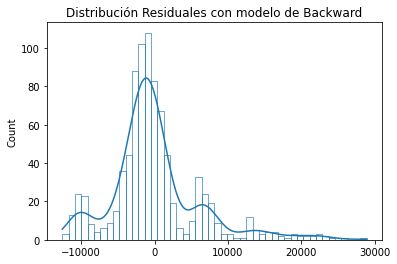

In [ ]:
sns.histplot(Residuales, fill=False, kde=True)

plt.title('Distribución Residuales con modelo de Backward')

## Homogeneidad de varianzas

como se observa en el gráfico, se evidencia grupos, pero principalmente una especie de embudo analizando de izquierda a derecha. Lo cual, se podría mejorar los resultados con ayuda de uan transformación en la variable de respuesta.

Además, la prueba de breuschpagan donde se tiene un valor-p inferiro a SL y corroborla la decisión.

Text(0, 0.5, 'residuales')

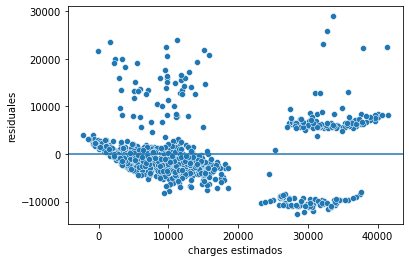

In [ ]:
sns.scatterplot(y=Residuales, x=y_prediccion)
plt.axhline(y=0)
plt.xlabel('charges estimados')
plt.ylabel('residuales')

In [ ]:
# TEST
name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test_varianzas = sms.het_breuschpagan(regression_OLS_backw.resid, regression_OLS_backw.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 83.97658232600169),
 ('p-value', 2.5007312721872028e-17),
 ('f-value', 23.141808241626574),
 ('f p-value', 3.548502505328882e-18)]

## Independencia

Con base al test hay evidencia estadística suficiente para decir que No se identifica autocorrelación de los errores.

In [ ]:
# TEST

if any(smd.acorr_ljungbox(Residuales, lags=10)[1]<0.05):
  print('hay autocorrelación en los errores')
else:
  print('No hay autocorrelación en los errores')

No hay autocorrelación en los errores


# Ajustes - propuetas de mejora del modelo.

Con base a los análisis, se puede plantear una transformación a la variable de respuesta, charges, para poder ayudar a la homogeneidad de varianzas y que posiblemente ayude a la normalidad de los errores, también.

Se puede hacer interacciones de las variables para analizar sus resultados, pues puede ayduar a mejorar el ajuste del modelo.

hcaer gráficos parciales de ajuste para verificar la linealidad de las covariables.

USar otro modelo, ExtraTreeRegressor

# BONO

Se hace una regresión por OLS y una con el algoritmo Random forest

In [ ]:
X_seleccionadas_backw['charges_raiz2'] = np.sqrt(y_train_categ)

# Ajuste del modelo lineal con mínimios cuadrados ordinarios con variables seleccionadas con BACKWARD
regression_OLS_backw_bono = smf.ols('charges_raiz2 ~ age	+ bmi + children + smoker', X_seleccionadas_backw).fit()
regression_OLS_backw_bono.summary()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          charges_raiz2   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     756.6
Date:                Fri, 25 Feb 2022   Prob (F-statistic):          1.89e-278
Time:                        23:09:18   Log-Likelihood:                -3872.3
No. Observations:                 856   AIC:                             7755.
Df Residuals:                     851   BIC:                             7778.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.9026      4.232     -0.686      0.493     -11.208       5.403
age            1.4585      0.055     26.532      0.000       1.351       1.566
bmi            0.9267      0.123      7.551      0.000       0.686       1.168
children       2.8297      0.634      4.463      0.000       1.585       4.074
smoker        93.1071      1.932     48.197      0.000      89.315      96.899
==============================================================================
Omnibus:                      305.184   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              997.420
Skew:                           1.744   Prob(JB):                    2.59e-217
Kurtosis:                       6.975   Cond. No.                         285.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# TEST hipotesis
name = ["Jarque-Bera", "Chi^2 two-tail prob.", "Skew", "Kurtosis"]
test_normalidad = sms.jarque_bera(regression_OLS_backw_bono.resid)
lzip(name, test_normalidad)

[('Jarque-Bera', 997.4204788428527),
 ('Chi^2 two-tail prob.', 2.587586940658624e-217),
 ('Skew', 1.7440604039539604),
 ('Kurtosis', 6.97467902904276)]

Text(0, 0.5, 'residuales')

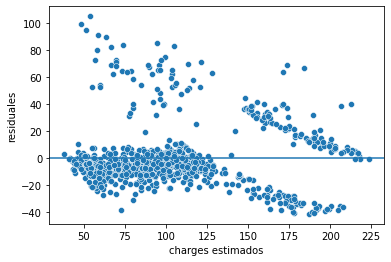

In [ ]:
sns.scatterplot(y=regression_OLS_backw_bono.resid, 
                x=regression_OLS_backw_bono.predict(X_seleccionadas_backw.drop('charges',axis=1)))
plt.axhline(y=0)
plt.xlabel('charges estimados')
plt.ylabel('residuales')

In [ ]:
# calculo cuadrado medio del error y R2 -DATA TRAIN

predicciones_train_bono_ols = regression_OLS_backw_bono.predict(X_seleccionadas_backw.drop(
                                                                                    ['charges', 'charges_raiz2'],
                                                                                    axis=1))

print('Se obtiene un MSE de: ', mean_squared_error(y_train_categ, predicciones_train_bono_ols))
f'TRAIN: R2 con todas las variables:', r2_score(X_seleccionadas_backw['charges_raiz2'] ,
                                                predicciones_train_bono_ols)

Se obtiene un MSE de:  312440824.17933065


('TRAIN: R2 con todas las variables:', 0.7805308299524689)

In [ ]:
# calculo cuadrado medio del error  y r2 - DATA TEST

preds_test_bono_ols = regression_OLS_backw_bono.predict(X_test_categ[modelo_backward.get_feature_names_out()] )
y_test_categ_raiz2 = np.sqrt(y_test_categ)

print('TEST-Se obtiene un MSE de: ', mean_squared_error(y_test_categ_raiz2, 
                                                        preds_test_bono_ols))
f'TEST- R2 con todas las variables:', r2_score(y_test_categ_raiz2,
                                                preds_test_bono_ols)

TEST-Se obtiene un MSE de:  449.6825682905253


('TEST- R2 con todas las variables:', 0.8113127841165583)

In [ ]:
# calculo cuadrado medio del error  y r2 - DATA VALIDACION

preds_val_bono_ols = regression_OLS_backw_bono.predict(X_val_categ[modelo_backward.get_feature_names_out()] )
y_val_categ_raiz2 = np.sqrt(y_val_categ)

print('VALIDACION-Se obtiene un MSE de: ', mean_squared_error(y_val_categ_raiz2, 
                                                        preds_val_bono_ols))
f'VALIDACION- R2 con todas las variables:', r2_score(y_val_categ_raiz2,
                                                preds_val_bono_ols)

VALIDACION-Se obtiene un MSE de:  639.3775712634487


('VALIDACION- R2 con todas las variables:', 0.7089384183161398)

Se identifica una leve mejoría en las estimaciones ya que el MSE del modelo anterior se obtuvo  36886465.1126579 y para este modelo con la transformación de la variable charges, se obtiene un menor MSE con 312440824.17933065. Esto también se refleja en el aumento del R2 y el R2-ajustado pasando a 78% y 77%, respectivamente.

Comportandose mejor en los datos test con un valor de 81% y 70% en validación, lo cual se debe realizar validación cruzada para tener un resultado confiable del R2

Sin embargo, aún no se cumplen con los supuestos de los errores, lo cual resulta poco confiable usar este modelo.

### Modelos Random Forest Regressión

Se usará este modelo con todas las variables y con las variables finales que s eobtuvieron con backward.


#### Modelo con todas las variables

In [ ]:
# con 1000 arboles de decisión
model_rforest = RandomForestRegressor(n_estimators = 1000, random_state = 42)
model_rforest.fit(X_train_categ, y_train_categ)

# data train
prediction_rforest = model_rforest.predict(X_train_categ)

print('TRAIN: MSE con todas las variables:', mean_squared_error(y_train_categ, prediction_rforest))
print('TRAIN: R2 con todas las variables:', r2_score(y_train_categ, prediction_rforest))

TRAIN: MSE con todas las variables: 3554602.813580076
TRAIN: R2 con todas las variables: 0.9754380391950962


In [ ]:
# con 1000 arboles de decisión
# data test
prediction_rforest_test = model_rforest.predict(X_test_categ)

print('TEST: MSE con todas las variables:', mean_squared_error(y_test_categ, prediction_rforest_test))
print('TEST: R2 con todas las variables:', r2_score(y_test_categ, prediction_rforest_test))

TEST: MSE con todas las variables: 19443085.399106305
TEST: R2 con todas las variables: 0.8778163136886327


In [ ]:
# con 1000 arboles de decisión
# data test
prediction_rforest_valid = model_rforest.predict(X_val_categ)

print('VALIDATION: MSE con todas las variables:', mean_squared_error(y_val_categ, prediction_rforest_valid))
print('VALIDATION: R2 con todas las variables:', r2_score(y_val_categ, prediction_rforest_valid))

VALIDATION: MSE con todas las variables: 27518433.235820744
VALIDATION: R2 con todas las variables: 0.8001493959090433


### Modelo con las variables seleccionadas del método backward


In [ ]:
# con 1000 arboles de decisión
model_rforest_backw = RandomForestRegressor(n_estimators = 1000, random_state = 42)
model_rforest_backw.fit(X_train_categ[modelo_backward.get_feature_names_out()], y_train_categ)

# data train
prediction_rforest_backw = model_rforest_backw.predict(X_train_categ[modelo_backward.get_feature_names_out()])

print('TRAIN: MSE -backward:', mean_squared_error(y_train_categ, prediction_rforest_backw))
print('TRAIN: R2 -backward:', r2_score(y_train_categ, prediction_rforest_backw))

TRAIN: MSE -backward: 3682484.476831162
TRAIN: R2 -backward: 0.9745543893008128


In [ ]:
# con 1000 arboles de decisión
model_rforest_backw = RandomForestRegressor(n_estimators = 1000, random_state = 42)
model_rforest_backw.fit(X_test_categ[modelo_backward.get_feature_names_out()], y_test_categ)

# data train
prediction_rforest_backw = model_rforest_backw.predict(X_test_categ[modelo_backward.get_feature_names_out()])

print('TEST: MSE -backward:', mean_squared_error(y_test_categ, prediction_rforest_backw))
print('TEST: R2 -backward:', r2_score(y_test_categ, prediction_rforest_backw))


TEST: MSE -backward: 2611865.18845899
TEST: R2 -backward: 0.9835865907944362


In [ ]:
# con 1000 arboles de decisión
model_rforest_backw = RandomForestRegressor(n_estimators = 1000, random_state = 42)
model_rforest_backw.fit(X_val_categ[modelo_backward.get_feature_names_out()], y_val_categ)

# data train
prediction_rforest_backw = model_rforest_backw.predict(X_val_categ[modelo_backward.get_feature_names_out()])

print('VALIDACION: MSE -backward:', mean_squared_error(y_val_categ, prediction_rforest_backw))
print('VALIDACION: R2 -backward:', r2_score(y_val_categ, prediction_rforest_backw))


VALIDACION: MSE -backward: 3413613.1938075065
VALIDACION: R2 -backward: 0.9752088844205253


# CONCLUSIÓN

Con base al modelo randon forest se logró mejores resultados, pero con subreajuste para el modelo que contiene todas las variables del dataset. Mientras, el modelo solamente con las variables seleccionadas con el método backward en el modelo lineal de las secciones anteriores selogrí un modelo con 98%, aproximadamente en todos los dataset. Sin embargo, sería bueno profundizar en revisar a fondo este modelo, pues su valor es bastante alto.

El modelo por OLS, tiene resultados más bajos en su performance y no cumple con los supuestos de los errores lo cual se debe profundizar en su diagnostico porque posiblemente hayan covariables con comportamientos no lienales. Evaluar polinomios, etc.

